# Colab Setup

In [1]:
print("Running script: pipeline_colab.py")
# model_name = "tiiuae/falcon-rw-1b"
# dataset_name = "wikitext"
# dataset_config_name = "wikitext-2-raw-v1"

model_name = "gpt2"
dataset_name = "wikitext"
dataset_config_name = "wikitext-2-raw-v1"
print(f"arguments: \n {model_name=} \n {dataset_name=} \n {dataset_config_name=}")

Running script: pipeline_colab.py
arguments: 
 model_name='gpt2' 
 dataset_name='wikitext' 
 dataset_config_name='wikitext-2-raw-v1'


In [2]:
import time
curr_time_str = "2025-05-18_16-06" #time.strftime("%Y-%m-%d_%H-%M", time.localtime())

In [3]:
# Check GPU availability
import torch
torch.cuda.is_available(), torch.cuda.get_device_name(0)


(True, 'NVIDIA TITAN Xp')

In [9]:
# Remove old clone
# import os, shutil

# repo_name = "ANeurIPS2024_SPV-MIA"
# if os.path.basename(os.getcwd()) == repo_name:
#     %cd ..
# if os.path.exists(repo_name):
#     print(f"Removing existing {repo_name}...")
#     shutil.rmtree(repo_name)

# Clone fork
# !git clone https://github.com/maidesu/ANeurIPS2024_SPV-MIA.git
# %cd ANeurIPS2024_SPV-MIA


In [10]:
# !pip install -q -r requirements-colab.txt

# Target Model Fine-tuning

In [5]:
import sys
import os
from regex import F


# Get the path to llms_finetune.py
finetune_script_path = "/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/ft_llms/llms_finetune.py"

# Verify the file exists
print(f"Script exists: {os.path.exists(finetune_script_path)}")

# Configure arguments as a dictionary

target_args = {
    "output_dir": os.path.join(".", "ft_llms", model_name, dataset_name, "target", curr_time_str),
    "block_size": 128,
    "eval_steps": 100,
    "save_epochs": 100,
    "log_steps": 200,
    "dataset_name": dataset_name,
    "model_name": model_name,
    "packing": True,
    "use_dataset_cache": True,
    "epochs": 10,
    "batch_size": 16,
    "learning_rate": 1e-4,
    "gradient_accumulation_steps": 1,
    "train_sta_idx": 0,
    "train_end_idx": 2000,
    "eval_sta_idx": 0,
    "eval_end_idx": 500,
    "dataset_config_name": dataset_config_name,
    "disable_flash_attention": True  # Added to avoid flash attention issues
}

print(f"target_args: {target_args}")
# Import the function
sys.path.append(os.path.dirname(finetune_script_path))
from llms_finetune import main_llms_finetune

# Run the fine-tuning with the dictionary arguments
main_llms_finetune(target_args)


Script exists: True
target_args: {'output_dir': './ft_llms/gpt2/wikitext/target/2025-05-18_17-22', 'block_size': 128, 'eval_steps': 100, 'save_epochs': 100, 'log_steps': 200, 'dataset_name': 'wikitext', 'model_name': 'gpt2', 'packing': True, 'use_dataset_cache': True, 'epochs': 10, 'batch_size': 16, 'learning_rate': 0.0001, 'gradient_accumulation_steps': 1, 'train_sta_idx': 0, 'train_end_idx': 2000, 'eval_sta_idx': 0, 'eval_end_idx': 500, 'dataset_config_name': 'wikitext-2-raw-v1', 'disable_flash_attention': True}


05/19/2025 10:19:22 - INFO - finetune - Wandb disabled by default.
05/19/2025 10:19:22 - INFO - finetune - Pad token id is None, setting to eos token id...
05/19/2025 10:19:22 - INFO - finetune - Using a block size of 128
05/19/2025 10:19:22 - INFO - finetune - Using no quantization
05/19/2025 10:19:34 - INFO - finetune - Using PEFT...
05/19/2025 10:19:34 - INFO - finetune - Getting PEFT model...
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


trainable params: 2359296 || all params: 126799104 || trainable%: 1.8606566809809635


05/19/2025 10:19:40 - INFO - finetune - Training with 1 GPUs
05/19/2025 10:19:40 - INFO - finetune - Train dataset size: 2000
05/19/2025 10:19:40 - INFO - finetune - Eval dataset size: 500
05/19/2025 10:19:40 - INFO - finetune - Output directory: ./ft_llms/gpt2/wikitext/target/2025-05-18_17-22


Folder './cache/wikitext/wikitext-2-raw-v1' already exists.


Using pad_token, but it is not set yet.
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/trl/trainer/sft_trainer.py:166: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(
Map: 100%|██████████| 500/500 [00:00<00:00, 8084.25 examples/s]
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/accelerate/accelerator.py:437: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
05/19/2025 10:19:41 - INFO - finetune - Starting training with config:
05/19/2025 10:19:41 - INFO - finetune - TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-06,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=True,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
d

Step,Training Loss,Validation Loss


Using sep_token, but it is not set yet.
Using cls_token, but it is not set yet.
Using mask_token, but it is not set yet.


KeyboardInterrupt: 

# Self-prompt Reference Model Fine-tuning

In [12]:
import sys
import os

# Get the path to refer_data_generate.py
refer_data_script_path = "/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/ft_llms/refer_data_generate.py"

# Verify the file exists
print(f"Script exists: {os.path.exists(refer_data_script_path)}")

# Configure arguments as a dictionary
refer_data_args = {
    "model_name": model_name,
    "target_model": os.path.join(".", "ft_llms", model_name, dataset_name, "target", curr_time_str),
    "dataset_name": dataset_name,
    "dataset_config_name": dataset_config_name,
    "cache_path": "./cache",
    "use_dataset_cache": True,
    "packing": True,
    "block_size": 128,
    "preprocessing_num_workers": 1,
    "validation_split_percentage": 0.1,
    "local_files_only": False,
    "curr_time_str": curr_time_str,
}

print(f"refer_data_args: {refer_data_args}")

# Import the function
sys.path.append(os.path.dirname(refer_data_script_path))
from refer_data_generate import run_data_generation

# Run the data generation with the dictionary arguments
run_data_generation(refer_data_args)


Script exists: True
refer_data_args: {'model_name': 'gpt2', 'target_model': './ft_llms/gpt2/wikitext/target/2025-05-18_16-06', 'dataset_name': 'wikitext', 'dataset_config_name': 'wikitext-2-raw-v1', 'cache_path': './cache', 'use_dataset_cache': True, 'packing': True, 'block_size': 128, 'preprocessing_num_workers': 1, 'validation_split_percentage': 0.1, 'local_files_only': False, 'curr_time_str': '2025-05-18_16-06'}
Running with arguments: <src.parser.Args object at 0x7f31591fe810>
Using device: cuda


/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/accelerate/accelerator.py:437: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading model from: ./ft_llms/gpt2/wikitext/target/2025-05-18_16-06


/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/transformers/modeling_utils.py:484: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(

Pad token id is None, setting to eos token id...
Preparing datasets...
Folder './cache/wikitext/wikitext-2-raw-v1' already exists.
Train dataset size: 16585
Generating texts...


  0%|          | 0/6585 [00:00<?, ?it/s]/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/transformers/generation/utils.py:1421: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  0%|          | 1/6585 [00:03<5:51:02,  3.20s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results

Sample generated text:  lowest bid. 
 The city of Las Vegas had lobbied hard to be the location of the casino's new Las Veg...


  0%|          | 2/6585 [00:05<5:12:42,  2.85s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  0%|          | 3/6585 [00:08<4:58:35,  2.72s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  0%|          | 4/6585 [00:10<4:51:52,  2.66s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  0%|          | 5/6585 [00:13<4:47:58,  2.63s/it]The attention mask and the pad token id were no

Saving generated dataset to ./cache/wikitext/wikitext-2-raw-v1/refer@gpt2/2025-05-18_16-06cuda


Saving the dataset (1/1 shards): 100%|██████████| 22/22 [00:00<00:00, 1823.79 examples/s]


Main process: concatenating datasets from all devices
Loading dataset from ./cache/wikitext/wikitext-2-raw-v1/refer@gpt2/2025-05-18_16-06/cuda
Saving final concatenated dataset to ./cache/wikitext/wikitext-2-raw-v1/refer@gpt2/2025-05-18_16-06


Saving the dataset (1/1 shards): 100%|██████████| 22/22 [00:00<00:00, 1624.64 examples/s]

Final dataset size: 22


True

In [13]:
# Check if the reference data directory exists
# !ls -la ./cache/wikitext/wikitext-2-raw-v1/

In [14]:
import os
import sys

# Get the path to llms_finetune.py
finetune_script_path = "/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/ft_llms/llms_finetune.py"

# Verify the file exists
print(f"Script exists: {os.path.exists(finetune_script_path)}")

# Configure reference model arguments as a dictionary
reference_args = {
    "refer": True,
    "output_dir": f"./ft_llms/{model_name}/{dataset_name}/refer/{curr_time_str}",
    "block_size": 128,
    "eval_steps": 100,
    "save_epochs": 100,
    "log_steps": 100,
    "dataset_name": dataset_name,
    "model_name": model_name,
    "packing": True,
    "use_dataset_cache": True,
    "epochs": 4,
    "batch_size": 16,
    "learning_rate": 5e-5,
    "gradient_accumulation_steps": 1,
    "train_sta_idx": 0,
    "train_end_idx": 2000,
    "eval_sta_idx": 0,
    "eval_end_idx": 500,
    "dataset_config_name": dataset_config_name,
    "disable_flash_attention": True,  # Added to avoid flash attention issues
    "curr_time_str": curr_time_str,
}

print(f"reference_args: {reference_args}")

# Import the function if not already imported
if 'main_llms_finetune' not in globals():
    sys.path.append(os.path.dirname(finetune_script_path))
    from llms_finetune import main_llms_finetune

# Run reference model fine-tuning
main_llms_finetune(reference_args)


Script exists: True
reference_args: {'refer': True, 'output_dir': './ft_llms/gpt2/wikitext/refer/2025-05-18_16-06', 'block_size': 128, 'eval_steps': 100, 'save_epochs': 100, 'log_steps': 100, 'dataset_name': 'wikitext', 'model_name': 'gpt2', 'packing': True, 'use_dataset_cache': True, 'epochs': 4, 'batch_size': 16, 'learning_rate': 5e-05, 'gradient_accumulation_steps': 1, 'train_sta_idx': 0, 'train_end_idx': 2000, 'eval_sta_idx': 0, 'eval_end_idx': 500, 'dataset_config_name': 'wikitext-2-raw-v1', 'disable_flash_attention': True, 'curr_time_str': '2025-05-18_16-06'}


/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


trainable params: 2359296 || all params: 126799104 || trainable%: 1.8606566809809635
Folder './cache/wikitext/wikitext-2-raw-v1' already exists.


Using pad_token, but it is not set yet.
/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/trl/trainer/sft_trainer.py:166: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(
Map: 100%|██████████| 500/500 [00:00<00:00, 6519.09 examples/s]
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss


# Run SPV-MIA

In [ ]:
# Add this to a cell in your notebook:
# import os
# os.environ["TOKENIZERS_PARALLELISM"] = "false"  # Avoid huggingface tokenizer warnings

# Install a compatible version of NLTK for Python 3.11
# !pip install -q nltk==3.8.1

# Download necessary NLTK data
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')

print("Environment ready for attack script")

[nltk_data] Downloading package wordnet to /home/liranc6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/liranc6/nltk_data...


Environment ready for attack script


[nltk_data]   Package omw-1.4 is already up-to-date!


Script exists: True
attack_args: {'model_name': 'gpt2', 'dataset_name': 'wikitext', 'dataset_config_name': 'wikitext-2-raw-v1', 'target_model': '/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/ft_llms/gpt2/wikitext/target/2025-05-18_16-06', 'reference_model': '/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/ft_llms/gpt2/wikitext/refer/2025-05-18_16-06', 'attack_type': 'ours', 'attack_strategy': {'name': 'embeddings', 'peak_top_k': 19, 'max_neighbors': 2, 'n_tokens': 5}}


/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/transformers/modeling_utils.py:484: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(

Folder './cache/wikitext/wikitext-2-raw-v1' already exists.


05/19/2025 18:07:57 - INFO - attack.attack_model - Preparing data...
05/19/2025 18:07:57 - INFO - attack.attack_model - Generating feature vectors for member data...
Generating perturbed samples:   0%|          | 0/1 [00:00<?, ?it/s]/home/liranc6/miniconda3/envs/spv_attack311/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/attack/attack_model.py:388: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for

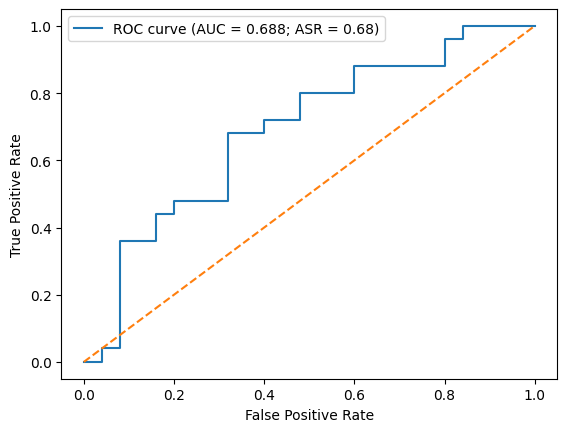

In [ ]:
import sys
import os


# Get the path to attack.py
attack_script_path = "/home/liranc6/W25/adversarial-attacks-on-deep-learning/project/ANeurIPS2024_SPV-MIA_not_official/run_attack.py"

# Verify the file exists
print(f"Script exists: {os.path.exists(attack_script_path)}")

# Import the attack function
sys.path.append(os.path.dirname(attack_script_path))
# Import the module first, then import the function
import run_attack
from run_attack import run_attack as run_attack_function

# Now you can reload if needed
import importlib
importlib.reload(run_attack)


dir_path = os.path.dirname(attack_script_path)
target_model_path = os.path.join(dir_path, "ft_llms", f"{model_name}", f"{dataset_name}", "target", curr_time_str)
reference_model_path = os.path.join(dir_path, "ft_llms", f"{model_name}", f"{dataset_name}", "refer", curr_time_str)

strategy = {"name": "embeddings", 'peak_top_k': 19, 'max_neighbors': 2, 'n_tokens': 5}

attack_args = {
    "model_name": model_name,
    "dataset_name": dataset_name,
    "dataset_config_name": dataset_config_name,
    "target_model": target_model_path,
    "reference_model": reference_model_path,
    "attack_type": "ours",
    "attack_strategy": strategy
    }

print(f"attack_args: {attack_args}")
# attack_args = {
#     "model_name": model_name,
#     "dataset_name": dataset_name,
#     "dataset_config_name": dataset_config_name,
#     "target_model": f"./ft_llms/{model_name}/{dataset_name}/target/",
#     "reference_model": f"./ft_llms/{model_name}/{dataset_name}/refer/",
#     }

# Run the attack with dictionary arguments
run_attack_function(attack_args)

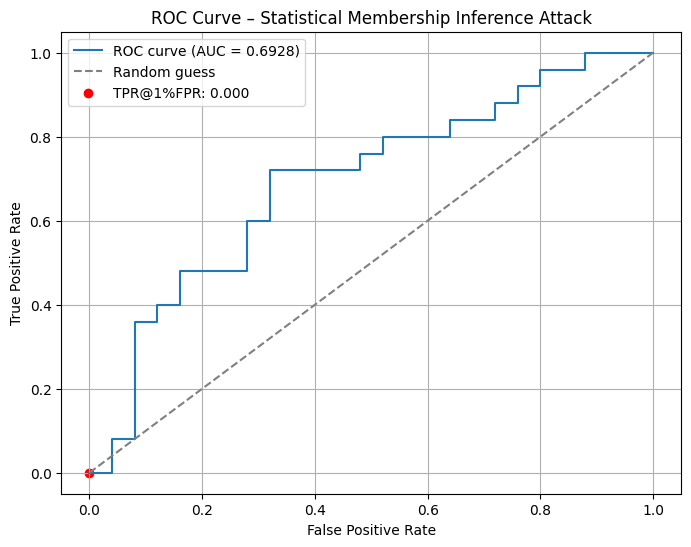

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load ROC curve data
ROC_dir = f"./cache/{dataset_name}/{dataset_config_name}/attack_data_{model_name}@{dataset_name}"
data_path = os.path.join(ROC_dir, "roc_stat.npz")
data = np.load(data_path)
fpr = data["fpr"]
tpr = data["tpr"]

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {np.round(np.trapz(tpr, fpr), 4)})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Statistical Membership Inference Attack")
plt.legend()
plt.grid(True)

# Mark TPR@1%FPR
fpr_1_index = np.argmin(np.abs(fpr - 0.01))
plt.scatter(fpr[fpr_1_index], tpr[fpr_1_index], color='red', label=f'TPR@1%FPR: {tpr[fpr_1_index]:.3f}')
plt.legend()

# Save the figure
fig_path = os.path.join(ROC_dir, "roc_stat.png")
plt.savefig(fig_path, dpi=300)
plt.show()
